In [4]:
import mne
import nibabel as nib
from fMRI import fMRI_transform
from EEG import EEG_transform
from settings import settings
from nilearn import image
import sklearn.decomposition
import numpy as np
from fMRI_Regions import atlas_masker
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


/Users/ilamiheev/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [ ]:
eeg.info

In [ ]:
np.shape(data)

In [7]:
fmri_im = image.smooth_img('/Users/ilamiheev/Downloads/eeg_fmri_data/fmri_off/fmri_off_1.nii', fwhm=6)

In [ ]:
np.shape(fmri_im)

In [ ]:
tau=np.zeros(146)

In [ ]:
np.shape(tau[0:142])

In [5]:
from scipy import signal
import sklearn.decomposition
from fMRI_Regions import atlas_masker
from sklearn.preprocessing import StandardScaler
f, t, ft = signal.stft(data[:,100000:115000],fs=1000, padded=True, nperseg=400)
ft = ft[:,2:20,:] 
ft1 = np.log1p(np.abs(ft))
K=signal.resample(ft1,60,axis=-1)

NameError: name 'data' is not defined

In [ ]:
ix_chs = f[2:20]

In [ ]:
ix_chs

In [ ]:
np.shape(f)

In [ ]:
trio1_mrcorrected_eoec_in-scan_hpump-on.set

In [10]:
bb=mne.io.read_raw_eeglab('/Users/ilamiheev/Downloads/eeg_fmri_data/CWL_Data/eeg/in-scan/trio1_corrected_eoec_in-scan_hpump-off.set')

<ipython-input-10-da75fe011742>:1: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['EOG', 'ECG', 'CW1', 'CW2', 'CW3', 'CW4', 'CW5', 'CW6']. Their position has been left untouched.
  bb=mne.io.read_raw_eeglab('/Users/ilamiheev/Downloads/eeg_fmri_data/CWL_Data/eeg/in-scan/trio1_corrected_eoec_in-scan_hpump-off.set')
<ipython-input-10-da75fe011742>:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  bb=mne.io.read_raw_eeglab('/Users/ilamiheev/Downloads/eeg_fmri_data/CWL_Data/eeg/in-scan/trio1_corrected_eoec_in-scan_hpump-off.set')
<ipython-input-10-da75fe011742>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  bb=mne.io.read_raw_eeglab('/Users/ilamiheev/Downloads/eeg_fmri_data/CWL_Data/eeg/in-scan/trio1_corrected_eoec_in-scan_hpump-off.set')


In [ ]:
bb.info

In [ ]:
np.shape(K)

In [ ]:

plt.plot(K[1,16,:])

plt.show()

In [19]:
%matplotlib notebook
plt.plot(ft1[1,100000:110000])

NameError: name 'ft1' is not defined

In [20]:
plt.plot(K[:,16,:])
plt.show()

NameError: name 'K' is not defined

In [11]:
mne.find_events(bb,stim_channel='Status')

ValueError: No stim channel found to extract event triggers.

In [13]:
k=mne.events_from_annotations(bb)

Used Annotations descriptions: ['boundary', '[]', 'R', 'Sync On', 'mri', 'S201', 'beo', 'S  1', 'eeo', 'fl', 'S241', 'S  5', 'R255', 'R254', 'S221', 'bec', 'eec']


In [ ]:
k

In [ ]:
a,b=np.where(k[0]==5)

In [14]:
import itertools
sss=[7,9,16,17]
vector=[]
for i,alpha in enumerate(sss):
    c=np.where(k[0][:,2]==alpha)
    vector.append(k[0][c,0])
#C=list(itertools.chain.from_iterable(vector[0][0]))

In [ ]:
vector[][0]

In [ ]:
np.shape(vector[i][0])[0]

In [15]:
stimulus_vector=[0.5,0.5,1,1,0.5,0.5,1,1,0.5,0.5,1,1,0.5,0.5,1,1,0.5,0.5]
time_vector=[]
for i  in range(len(vector)):
    for j in range(np.shape(vector[i][0])[0]):
        time_vector.append(vector[i][0][j]/1000)


In [ ]:
time_vector

In [16]:
time_vector.sort()

In [ ]:
fin=np.concatenate(vector[],, axis=None)

In [ ]:
vector

In [ ]:
for s in len(vector[0][0])

In [ ]:
p=[]
for j in range(len(C)):
    p.append(1)
    

<StemContainer object of 3 artists>

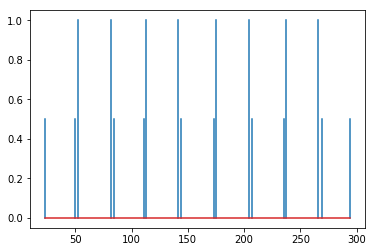

In [17]:

plt.stem(time_vector,stimulus_vector,markerfmt=" ")

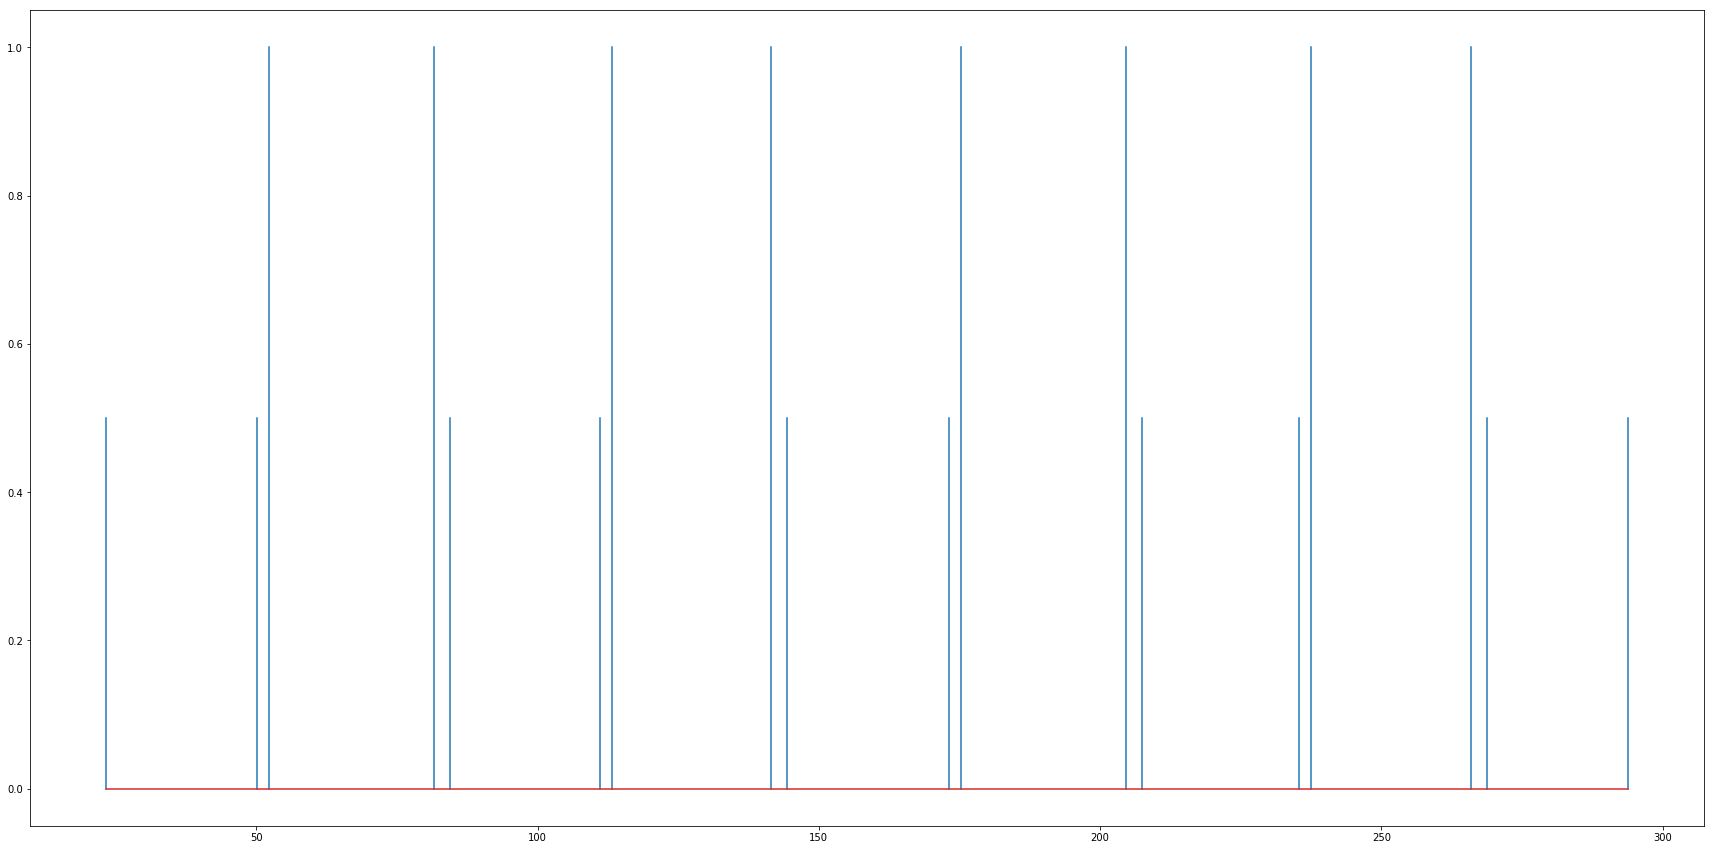

In [18]:
plt.figure(figsize=(30,15))
ax1 = plt.subplot(1,1,1)
ax1.stem(time_vector,stimulus_vector,markerfmt=" ")
plt.show()


In [35]:
eeg = mne.io.read_raw_edf('/Users/ilamiheev/Downloads/eeg_fmri_data/eeg_off/eeg_off_1.edf',exclude=['EOG', 'ECG','CW1', 'CW2','CW3','CW4','CW5','CW6','Status'])
data = eeg.get_data()
channels=eeg.ch_names
eeg1=data
f, t, ft = signal.stft(eeg1[:,0:2000],fs=1000, nperseg=5)
ix_chs = f[2:20] 

Extracting EDF parameters from /Users/ilamiheev/Downloads/eeg_fmri_data/eeg_off/eeg_off_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [34]:
f

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
       440., 450., 460., 470., 480., 490., 500.])

In [ ]:
fint = interp1d(np.linspace(delay,fmri_end,140), fmri_tensor[0:140,bnm], kind='cubic')
mmm=fint(k)
t_list.append(mmm)

In [ ]:
vector

In [ ]:
mne.viz.plot_events(k, bb.info['sfreq'], bb.first_samp)

In [ ]:
c,d=np.where(k[0]==6)

In [ ]:
f,g=np.where(k[0]==6)

In [ ]:
t,y=np.where(k[0]==6)

In [ ]:
k[1]['mri']

In [ ]:
m

In [ ]:
np.shape(s)

In [ ]:
>> unique, counts = numpy.unique(a, return_counts=True)
>>> dict(zip(unique, counts))
{0: 7, 1: 4, 2: 1, 3: 2, 4: 1}

In [ ]:
from collections import Counter


In [ ]:
Counter(s)

In [ ]:
m=k[0]
(m==4).sum()


In [ ]:
m=k[0]
(m==7).sum()

In [ ]:
/Users/ilamiheev/Downloads/CWL_Data/mri/epi_normalized/rwatrio1_eoec_in-scan_hpump-on.nii

In [ ]:
t=np.array(m)

In [ ]:
import glob
eeg_paths=glob.glob("/Users/ilamiheev/Downloads/CWL_Data/eeg/in-scan/*.set")

In [ ]:
eeg_paths

In [ ]:
bb=mne.io.read_raw_eeglab('/Users/ilamiheev/Downloads/CWL_Data 3/eeg/in-scan/trio2_mrcorrected_eoec_in-scan_hpump-off.set')

In [ ]:
bb

In [2]:
def get_masked_fMRI(y):
    m = atlas(y)
    return m
def atlas(k):
    masker, labels
    time_series = masker.fit_transform(k)
    return time_series


In [3]:
fmri=get_masked_fMRI(fmri_im)

NameError: name 'fmri_im' is not defined

In [ ]:
plt.plot(fmri[0:144,9])
plt.show()

In [ ]:
labels

In [ ]:
masker, labels = atlas_masker('sub')

In [ ]:
labels

In [1]:
mne.viz.plot_events(k, raw.info['sfreq'], raw.first_samp, color=color,
                    event_id=event_id)

NameError: name 'mne' is not defined

In [22]:
eeg = mne.io.read_raw_brainvision('/Users/ilamiheev/Downloads/EEG1/32/export/20130410320002_Segmentation_bin.vhdr')


Extracting parameters from /Users/ilamiheev/Downloads/EEG1/32/export/20130410320002_Segmentation_bin.vhdr...
Setting channel info structure...


<ipython-input-22-53181b807227>:1: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision('/Users/ilamiheev/Downloads/EEG1/32/export/20130410320002_Segmentation_bin.vhdr')


<IPython.core.display.Javascript object>


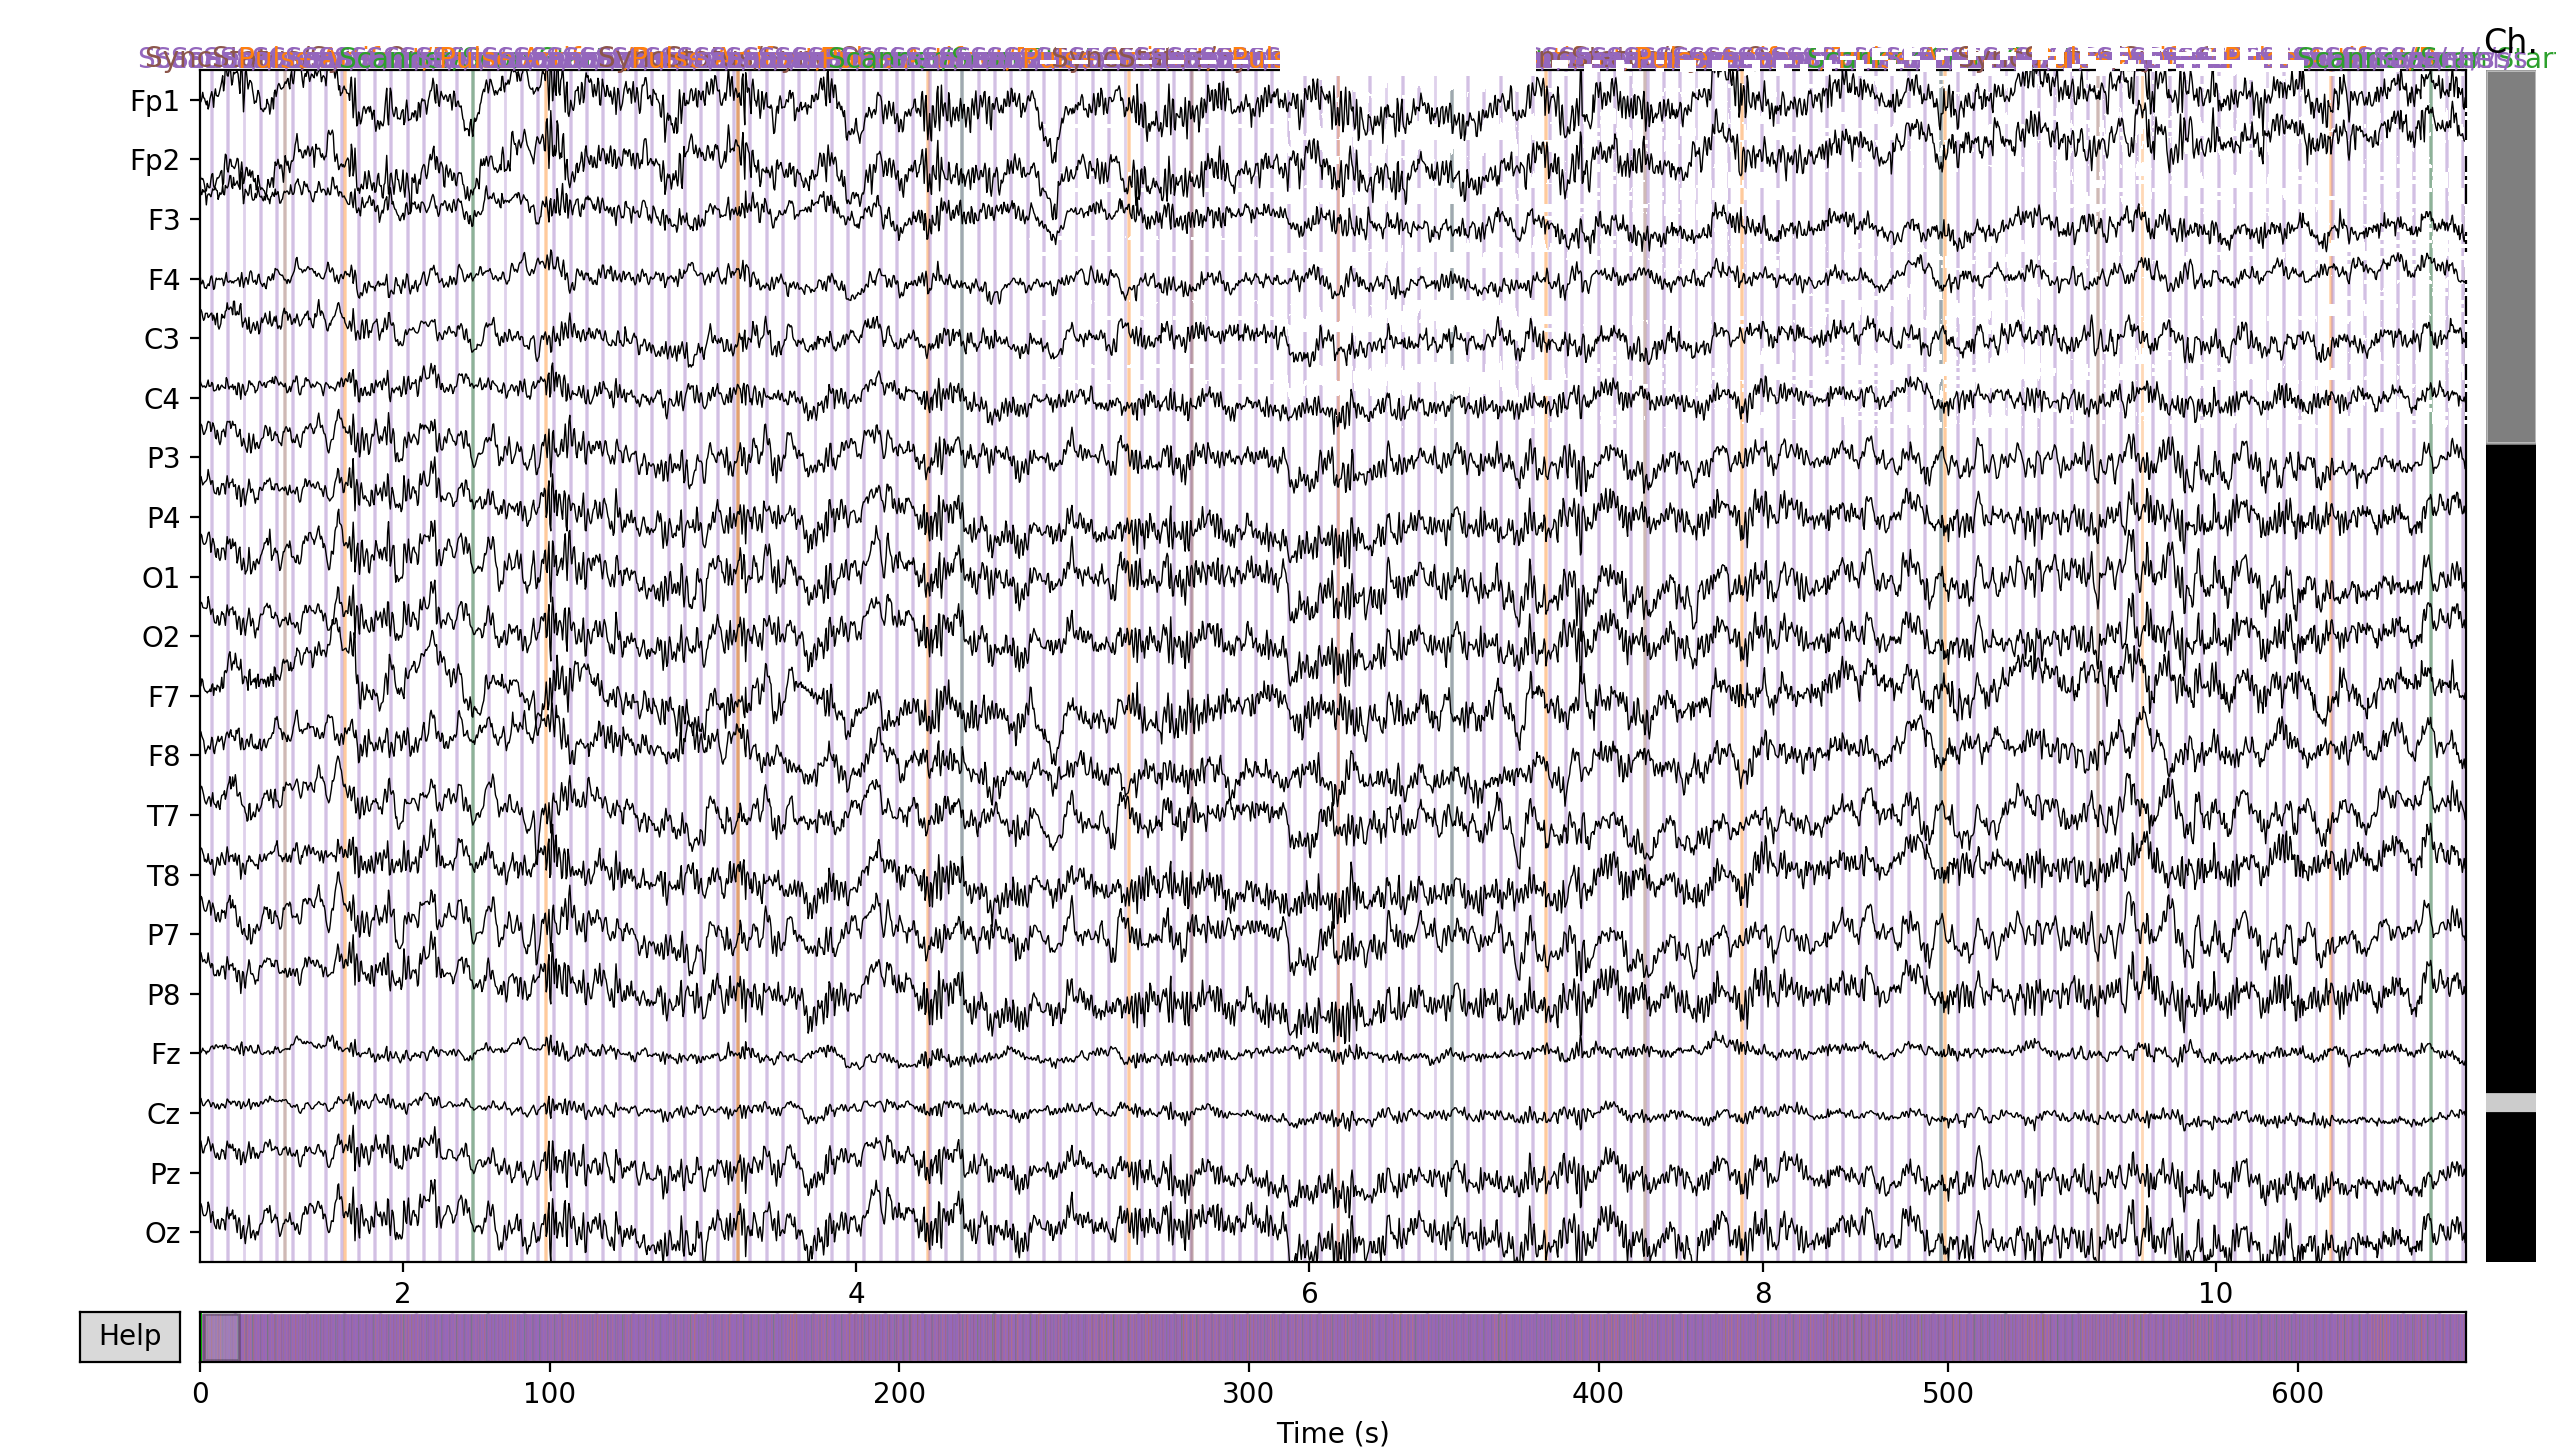

<IPython.core.display.Javascript object>


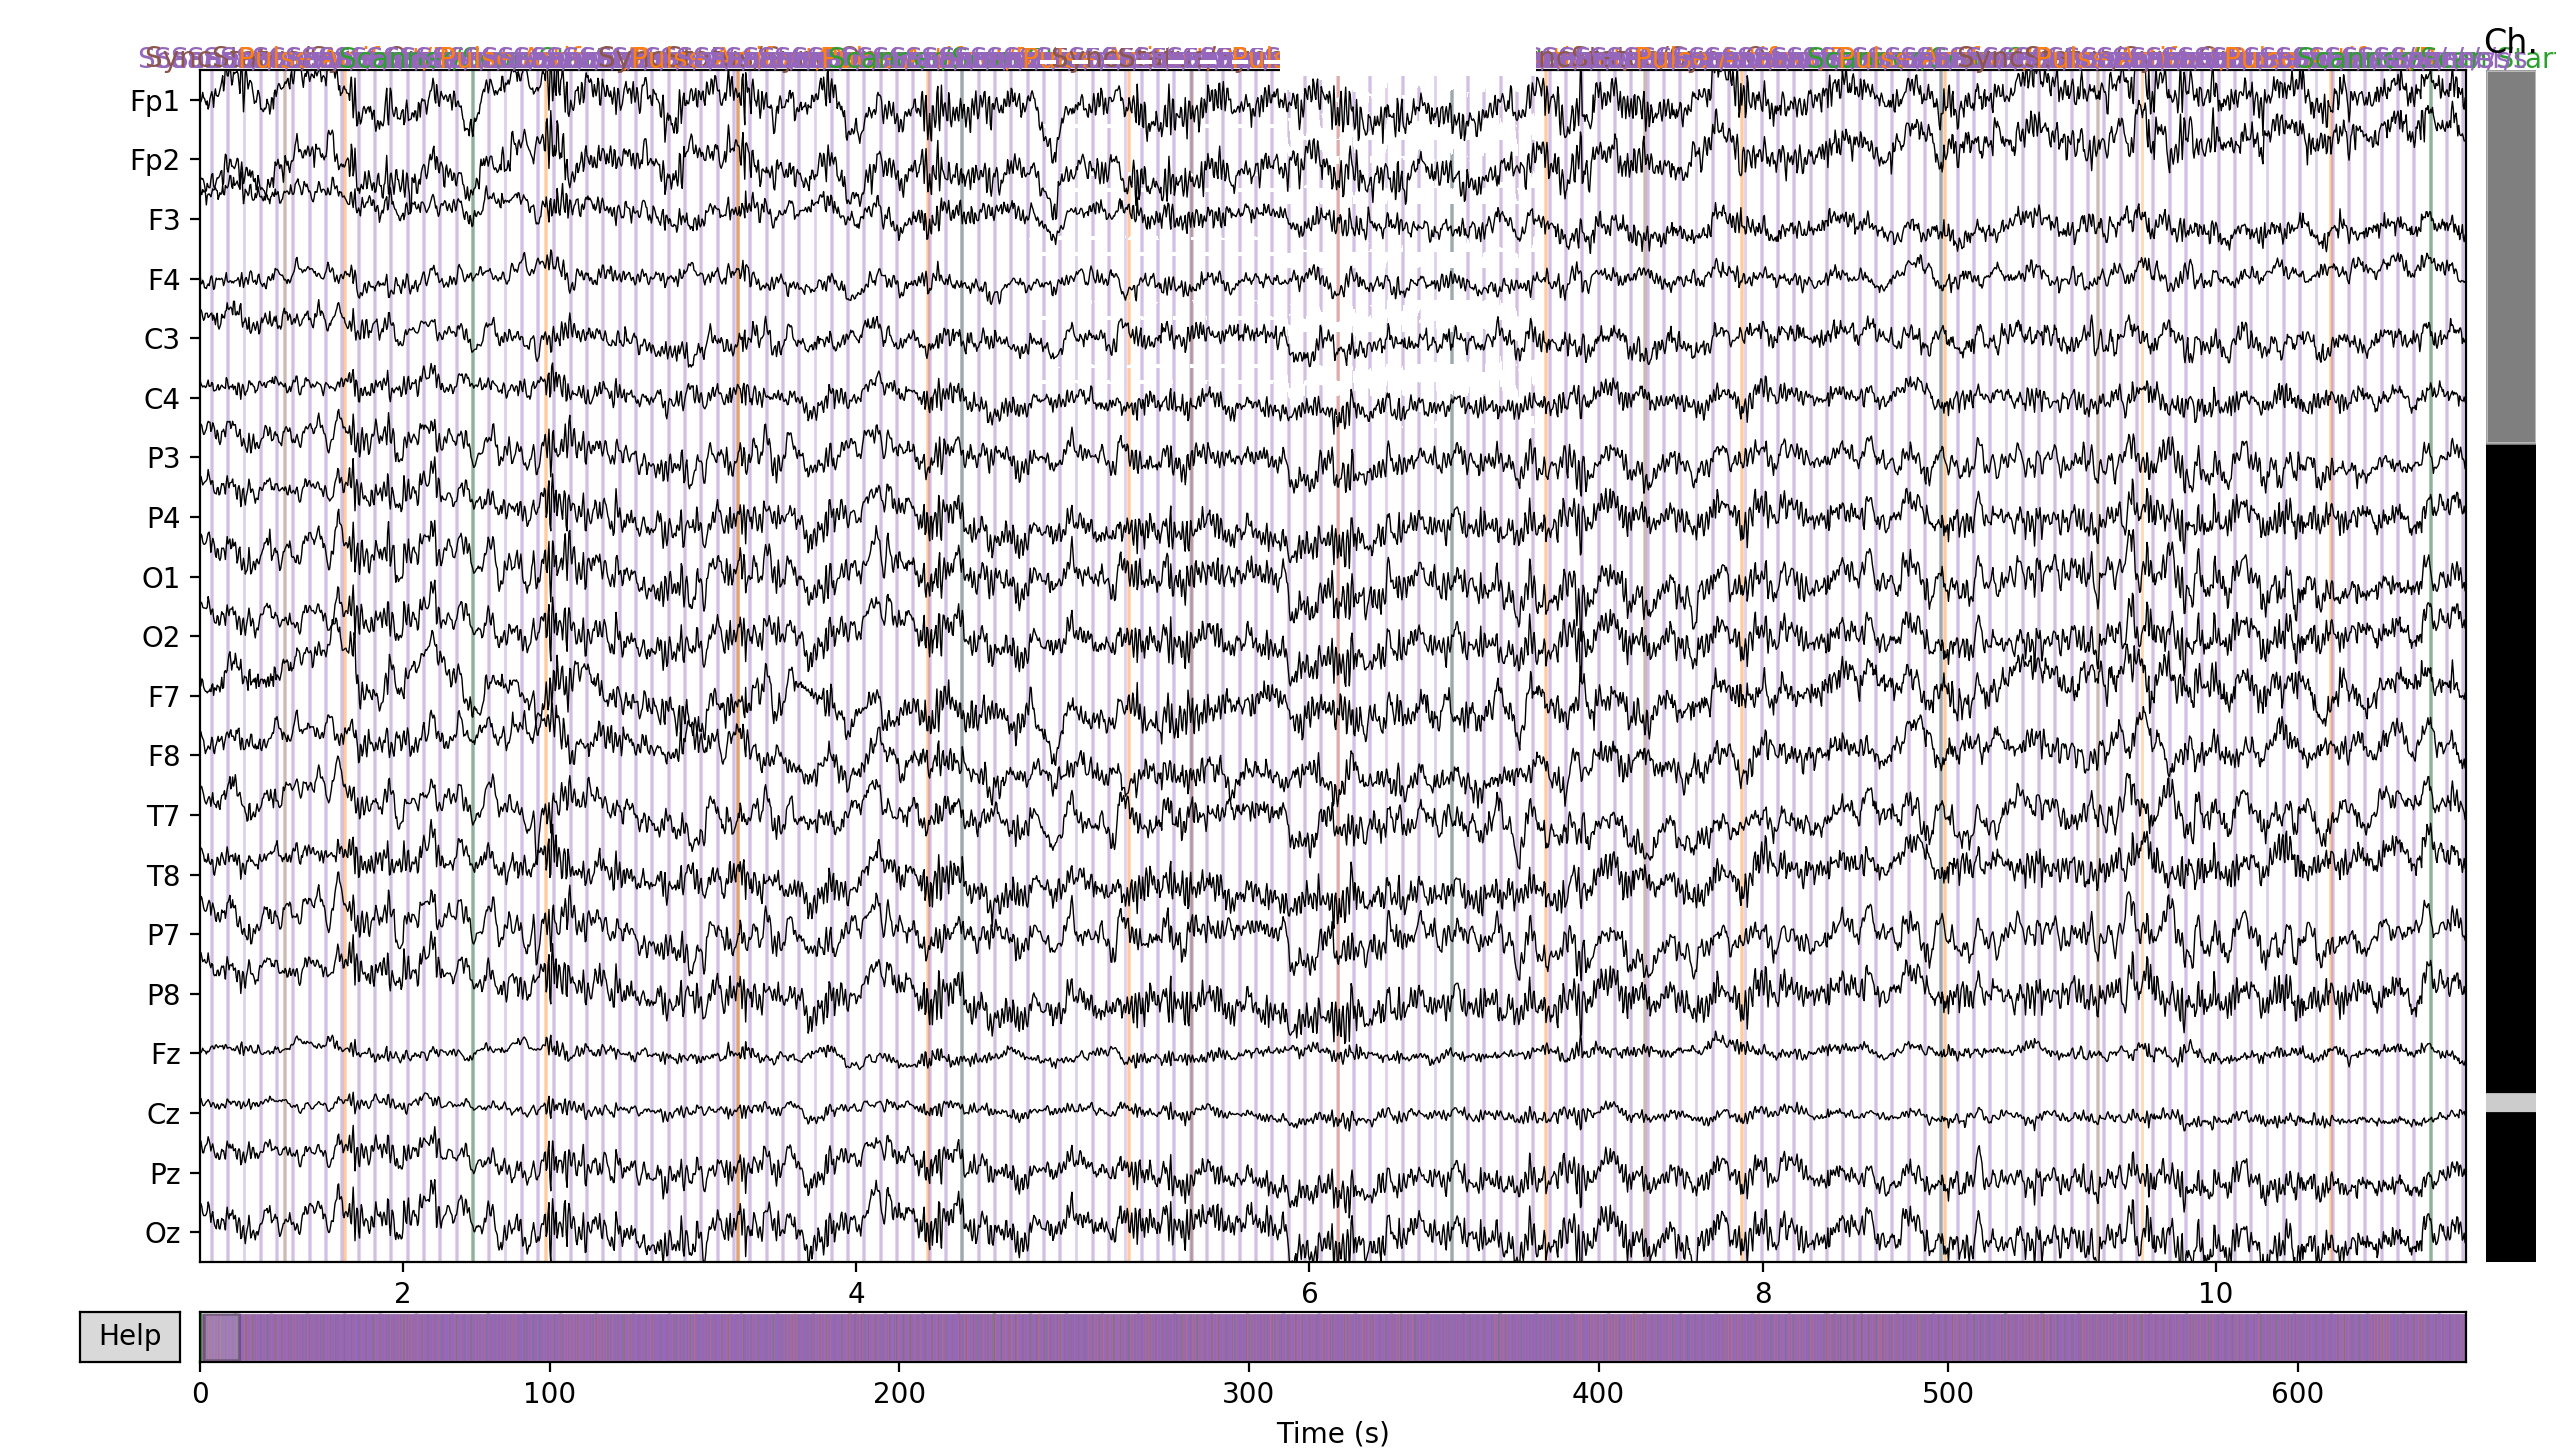

In [24]:
eeg.plot()
